### Lead Scoring Assignment By Arpana, Jayanand and Rajesh

#### Problem Statement
- An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

#### Goals
   - To build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

#### Importing the required libraries

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#Supressing warnings
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

### Step 1: Reading and Understanding the dataset

In [167]:
#Reading the dataset and printing the first 5 rows
df_lead = pd.read_csv("Leads.csv")
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [168]:
#checking the dimensions of the dataframe
df_lead.shape

(9240, 37)

In [169]:
#From the result, we can observe that there are null values in some columns
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [170]:
#Describing the dataframe
df_lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Step 2: Data Cleaning

#### 1) Dropping unecessary columns.

In [171]:
#Dropping the column 'Prospect ID' as it only indicates the ID of the people who are contacted and has all unique values
df_lead = df_lead.drop(['Prospect ID'], 1)
df_lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Column 'Lead Number' also has all unique values. But, let's not drop it as it is useful for the identification of leads.

In [172]:
#The columns which have only 1 unique values for all the leads can be dropped
columns = []
for i in df_lead.columns:
    if df_lead[i].nunique() ==1:
        columns.append(i)
df_lead.drop(columns, axis =1,inplace = True)
df_lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


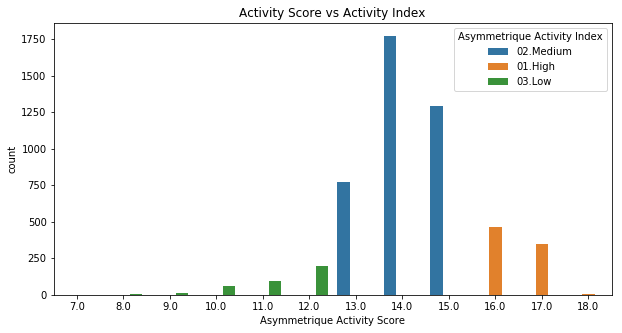

In [173]:
#Using count plot to understand the relationship between the score and index assigned to each user based on their activity 
plt.figure(figsize = (10,5))
plt.title("Activity Score vs Activity Index")
sns.countplot(x = 'Asymmetrique Activity Score', hue ='Asymmetrique Activity Index',data = df_lead)
plt.show()

#### Inferences from the above count plot
    - Leads with Activity Score 7-12 have Low Activity Index.
    - Leads with Activity Score 13-15 have Medium Activity Index.
    - Leads with Activity Score 16-18 have High Activity Index.

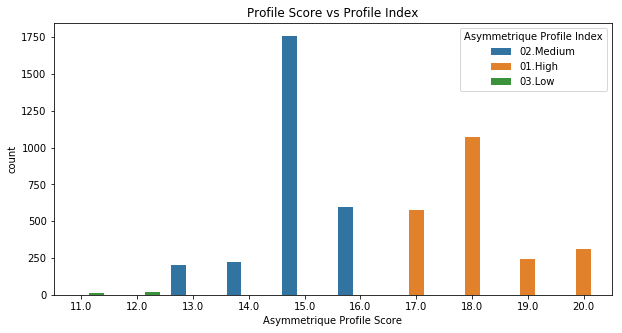

In [174]:
#Using count plot to understand the relationship between the score and index assigned to each user based on their profile
plt.figure(figsize = (10,5))
plt.title("Profile Score vs Profile Index")
sns.countplot(x = 'Asymmetrique Profile Score', hue ='Asymmetrique Profile Index',data = df_lead)
plt.show()

#### Inferences from the above count plot
    - Leads with Profile Score 11,12 have Low Profile Index.
    - Leads with Profile Score 13-16 have Medium Profile Index.
    - Leads with Profile Score 17-20 have High Profile Index.

#### From the above two plots, we can observe that the column 'Asymmetrique Activity Score' is very well explained by the column 'Asymmetrique Activity Index' and 'Asymmetrique Profile Score' by 'Asymmetrique Profile Index'

#### Hence, 'Asymmetrique Activity Score'  and 'Asymmetrique Profile Score' can be dropped

In [175]:
#Dropping the columns 'Asymmetrique Profile Score' & 'Asymmetrique Activity Score'.
df_lead.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score'], axis = 1, inplace = True)
df_lead.shape

(9240, 29)

#### 2) Dealing with uncertain values of the Leads

The dataset has many columns with values as 'Select'. This is because customer did not select any option from the list. It might be left unselected due to the below reasons:
 - Mistake in data entry. In this case, it is preferred to impute NaN as imputing with any other values might affect the analysis
 - The user didn't find any relevant option in the given list of options. In this case, it is preferred to impute 'Select' with 'Other'

In [176]:
#Finding the columns which have 'Select' values
df_lead.columns[df_lead.isin(['Select']).any()]

Index(['Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City'],
      dtype='object')

In [177]:
# Handling Specialization column
df_lead['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [178]:
#Select category has the maximum counts than other specializations
#Imputing with NaN value as imputing with some other value might affect the analysis
df_lead['Specialization'] = df_lead['Specialization'].replace('Select', np.nan)

In [179]:
# Handling `How did you hear about X Education` column
df_lead['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [180]:
#Select category has the maximum counts in this column as well
#Imputing with NaN value as imputing with some other value might affect the analysis
df_lead['How did you hear about X Education'] = df_lead['How did you hear about X Education'].replace('Select',np.nan)

In [181]:
# Handling `Lead Profile` column
df_lead['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [182]:
#Select category has the maximum counts in this column as well
#Imputing with NaN value as imputing with some other value might affect the analysis
df_lead['Lead Profile'] = df_lead['Lead Profile'].replace('Select',np.nan)

In [183]:
# Handling `City` column
df_lead['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [184]:
#Select category has the maximum counts in this column as well
#Imputing with NaN value as imputing with some other value might affect the analysis
df_lead['City'] = df_lead['City'].replace('Select',np.nan)

#### 3) Handling Missing values

In [185]:
#checking the percentage of missng values in columns
round((df_lead.isnull().sum()/len(df_lead.index) *100),2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Call                                       0.00
Lead Origi

In [186]:
#Dropping the columns which have missing values more than 40% 
df_lead.drop(df_lead.loc[:,list(round((df_lead.isnull().sum()/len(df_lead.index)*100),2)>40)].columns,axis =1, inplace = True)

In [187]:
#checking the percentage of missng values in columns again
round((df_lead.isnull().sum()/len(df_lead.index) *100),2).sort_values(ascending = False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Newspaper 

#### Imputing the missing values of the columns 'City', 'What matters most to you in choosing a course', 'What is your current occupation', 'Country with mode'

In [188]:
df_lead['City'].fillna(df_lead.City.mode()[0],inplace = True)
df_lead['What matters most to you in choosing a course'].fillna(df_lead['What matters most to you in choosing a course'].mode()[0],inplace = True)
df_lead['What is your current occupation'].fillna(df_lead['What is your current occupation'].mode()[0],inplace = True)
df_lead['Country'].fillna(df_lead.Country.mode()[0],inplace = True)

In [189]:
df_lead['Specialization'].value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### Grouping similar specialisations into a category to gain more meaningful insights.

In [190]:
# Grouping all the management specialisations into 'Management'
manage_cols = ['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management']
df_lead['Specialization'] = df_lead['Specialization'].replace(manage_cols,'Management')

# Grouping all the E-Commerce specialisations into 'E-Business'
df_lead['Specialization'] = df_lead['Specialization'].replace('E-COMMERCE','E-Business')

In [191]:
#Checking the unique values
df_lead['Specialization'].value_counts(dropna=False)

Management                           4253
NaN                                  3380
Business Administration               403
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
E-Business                            169
Rural and Agribusiness                 73
Services Excellence                    40
Name: Specialization, dtype: int64

In [192]:
#Imputing NaN values with 'Other' as imputing with mode will affect the analysis
df_lead['Specialization'] = df_lead['Specialization'].replace(np.nan,'Others')

In [193]:
#Checking the unique values in Tags column
df_lead['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

#### Grouping similar Tags into a category to gain more meaningful insights.

In [194]:
# Grouping similar tags intp one category 
df_lead['Tags'] = df_lead['Tags'].replace(['Ringing','switched off','Busy','opp hangup'],'Try Calling again')
df_lead['Tags'] = df_lead['Tags'].replace(['Lost to EINS','Lost to Others'],'Lost')
df_lead['Tags'] = df_lead['Tags'].replace(['Not doing further education','Diploma holder (Not Eligible)'],'Not Eligible/Not Interested')
df_lead['Tags'] = df_lead['Tags'].replace(['invalid number','wrong number given','number not provided'],'No Phone Number')

In [195]:
#Imputing NaN values with 'Other' as imputing with mode will affect the analysis
df_lead['Tags'] = df_lead['Tags'].replace(np.nan,'Others')

In [196]:
#checking the percentage of missng values in columns again
round((df_lead.isnull().sum()/len(df_lead.index) *100),2).sort_values(ascending = False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Last Notable Activity                            0.00
A free copy of Mastering The Interview           0.00
Lead Origin                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
Total Time Spent on Website                      0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [197]:
#Checking Lead Source column
df_lead['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
Pay per Click Ads       1
youtubechannel          1
testone                 1
welearnblog_Home        1
blog                    1
WeLearn                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [198]:
#Grouping similar categories to avoid confusion
df_lead['Lead Source'] = df_lead['Lead Source'].replace('google','Google')
df_lead['Lead Source'] = df_lead['Lead Source'].replace('Facebook','Social Media')

In [199]:
#Combining sources that have less value counts to simplify our analysis.
less = ['bing','Click2call','Live Chat','Press_Release','welearnblog_Home','blog','testone','NC_EDM','youtubechannel','Pay per Click Ads','WeLearn']
df_lead['Lead Source'] = df_lead['Lead Source'].replace(less,'Others')

In [200]:
#Imputing NaN values with 'Other'
df_lead['Lead Source'] = df_lead['Lead Source'].replace(np.nan,'Others')

In [201]:
#Checking the 'Last Activity' column
df_lead['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [202]:
#Imputing NaN values with 'Other'
df_lead['Last Activity'] = df_lead['Last Activity'].replace(np.nan,'Others')

In [203]:
#Combining categories that have less value counts to simplify our analysis.
cols =['Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow','Unreachable','Unsubscribed']
df_lead['Last Activity'] = df_lead['Last Activity'].replace(cols,'others')

In [204]:
#Dropping the rows that have very less missing values
df_lead.dropna(inplace = True)

In [205]:
#Checking the percentage of missing values 
round((df_lead.isnull().sum()/len(df_lead.index) *100),2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

#### Handling duplicates

In [206]:
#Checking and dropping the duplicates
df_lead.drop_duplicates(subset=None, inplace=True)
df_lead.shape

(9103, 24)

#### Checking null values in rows

In [207]:
#null values in rows
df_lead.isnull().sum(axis=1).sort_values(ascending=False)

9239    0
3106    0
3112    0
3111    0
3110    0
3109    0
3108    0
3107    0
3105    0
3114    0
3104    0
3103    0
3102    0
3101    0
3100    0
3099    0
3113    0
3115    0
3097    0
3124    0
3130    0
3129    0
3128    0
3127    0
3126    0
3125    0
3123    0
3116    0
3122    0
3121    0
       ..
6161    0
6160    0
6159    0
6158    0
6156    0
6181    0
6155    0
6153    0
6152    0
6151    0
6150    0
6149    0
6164    0
6165    0
6166    0
6167    0
6168    0
6169    0
6170    0
6171    0
6172    0
6173    0
6174    0
6175    0
6176    0
6177    0
6178    0
6179    0
6180    0
0       0
Length: 9103, dtype: int64

In [208]:
#Combining all the categories of Last Notable Activity which have less count

lowCount_cols = ['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Form Submitted on Website',
'Resubscribed to emails','Approached upfront','Email Received','View in browser link Clicked']

df_lead['Last Notable Activity'] = df_lead['Last Notable Activity'].replace(lowCount_cols,'Other')

In [209]:
#Changing the data type of 'TotalVisits'
df_lead['TotalVisits'] = df_lead['TotalVisits'].astype('int64')

### Step 3 :  Exploratory Data Analysis & Outlier treatment

#### Finding the data imbalance

In [210]:
#Checking Data imbalance 
round(((sum(df_lead['Converted'])/len(df_lead.index))*100),2)

38.02

#### Clearly, there's imbalance in the data. Only 38% of the leads are converted and the remaining 62% are not converted.

#### Visualizing numerical columns - Univariate Analysis

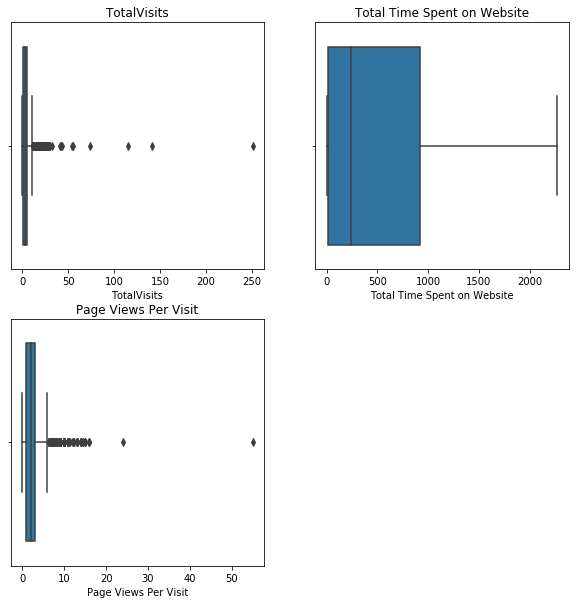

In [211]:
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.title("TotalVisits")
sns.boxplot(x = 'TotalVisits', data = df_lead)

plt.subplot(2,2,2)
plt.title("Total Time Spent on Website")
sns.boxplot(x = 'Total Time Spent on Website', data = df_lead)

plt.subplot(2,2,3)
plt.title("Page Views Per Visit")
sns.boxplot(x = 'Page Views Per Visit', data = df_lead)

plt.show()

#### From the above boxplots we can observe that there are outliers in the columns 'TotalVisits' and 'Page Views Per Visit'

#### Handling Outliers

In [212]:
#Removing outliers using IQR

Q1 = df_lead['Page Views Per Visit'].quantile(0.01)
Q3 = df_lead['Page Views Per Visit'].quantile(0.99)
df_lead = df_lead.loc[(df_lead['Page Views Per Visit'] >= Q1) & (df_lead['Page Views Per Visit'] <= Q3)]

Q1 = df_lead['Total Time Spent on Website'].quantile(0.01)
Q3 = df_lead['Total Time Spent on Website'].quantile(0.99)
df_lead = df_lead.loc[(df_lead['Total Time Spent on Website'] >= Q1) & (df_lead['Total Time Spent on Website'] <= Q3)]

Q1 = df_lead['TotalVisits'].quantile(0.01)
Q3 = df_lead['TotalVisits'].quantile(0.99)
df_lead = df_lead.loc[(df_lead['TotalVisits'] >= Q1) & (df_lead['TotalVisits'] <= Q3)]

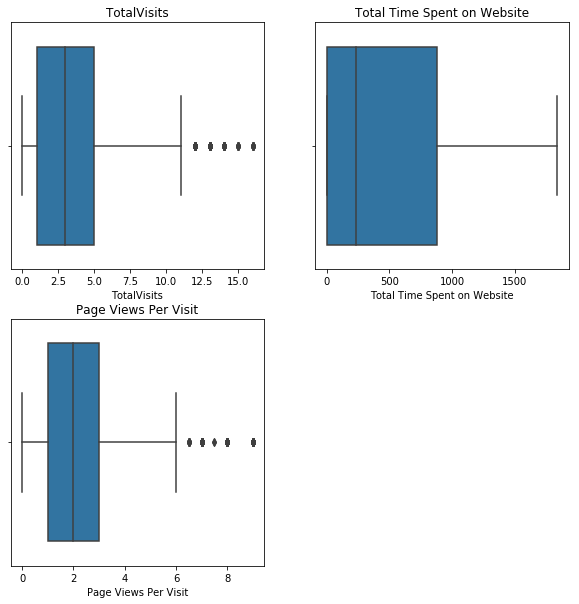

In [213]:
#Plotting box plots to check outliers after outlier treatment

plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.title("TotalVisits")
sns.boxplot(x = 'TotalVisits', data = df_lead)

plt.subplot(2,2,2)
plt.title("Total Time Spent on Website")
sns.boxplot(x = 'Total Time Spent on Website', data = df_lead)

plt.subplot(2,2,3)
plt.title("Page Views Per Visit")
sns.boxplot(x = 'Page Views Per Visit', data = df_lead)

plt.show()

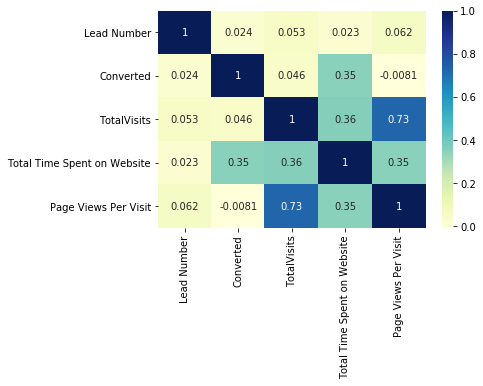

In [214]:
#Checking the correlation between numerical columns
sns.heatmap(df_lead.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### From the above heatmap, we can observe that there is good correlation between 'TotalVisits' and 'Page Views Per Visit'. Other columns are not highly correalted 

#### Visualizing categorical columns - Univariate Analysis

#### Plotting count plots to understand the relationship between predictors and target more clearly and draw useful insights

In [215]:
# Defining a custom function which plots count plots for all categorical columns with Converted as hue
def count_plot(col):
    plt.figure(figsize =(15,5))
    sns.countplot(df_lead[col], hue=df_lead.Converted)    
    plt.title(col + " vs Converted")
    plt.xticks(rotation = 90)
    plt.show()

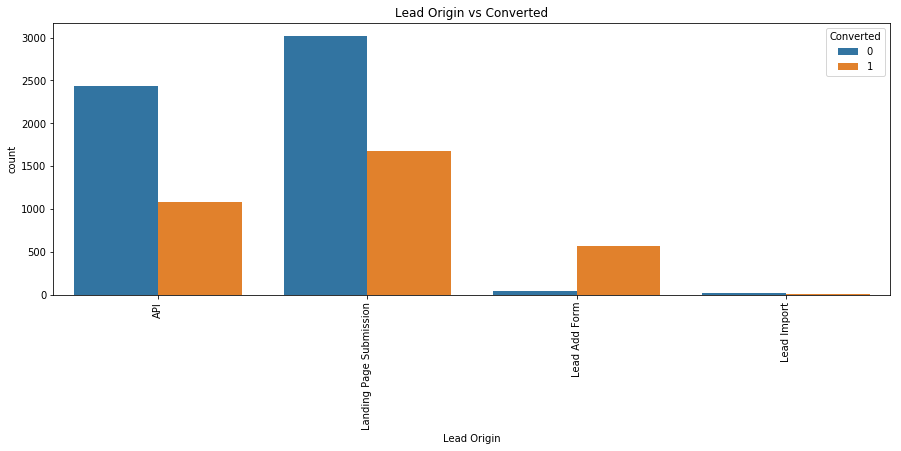

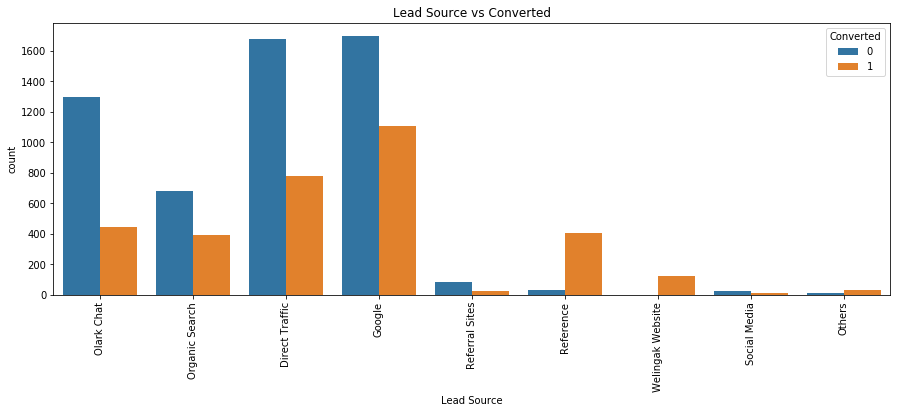

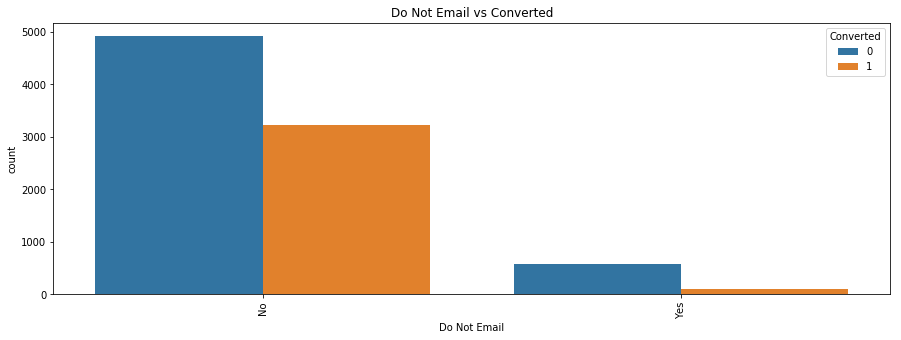

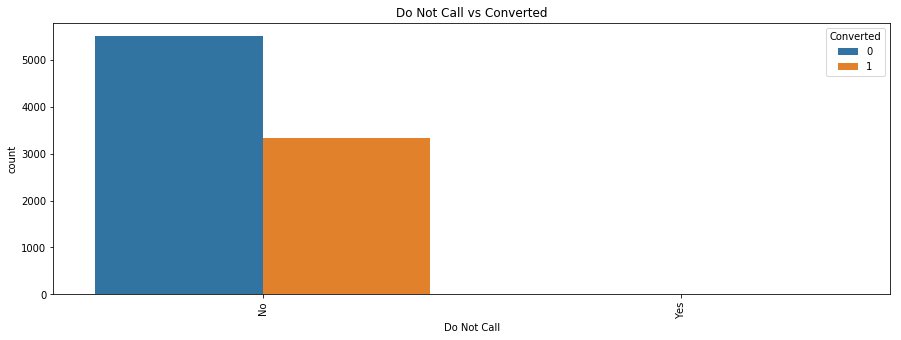

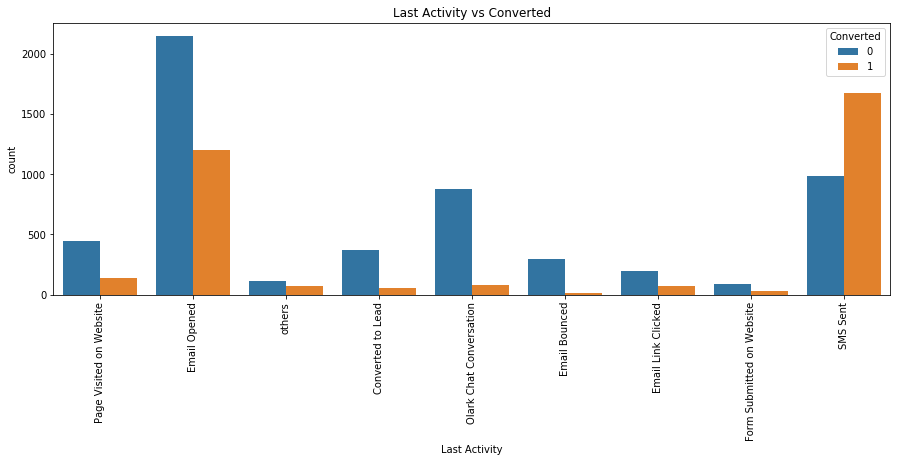

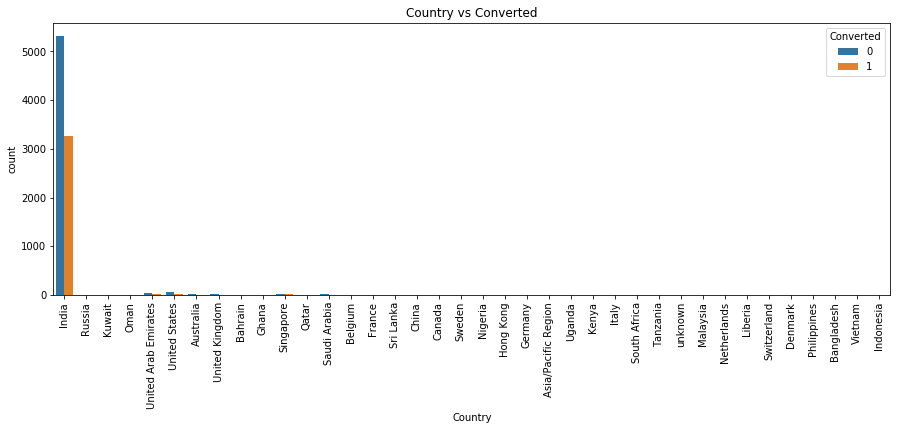

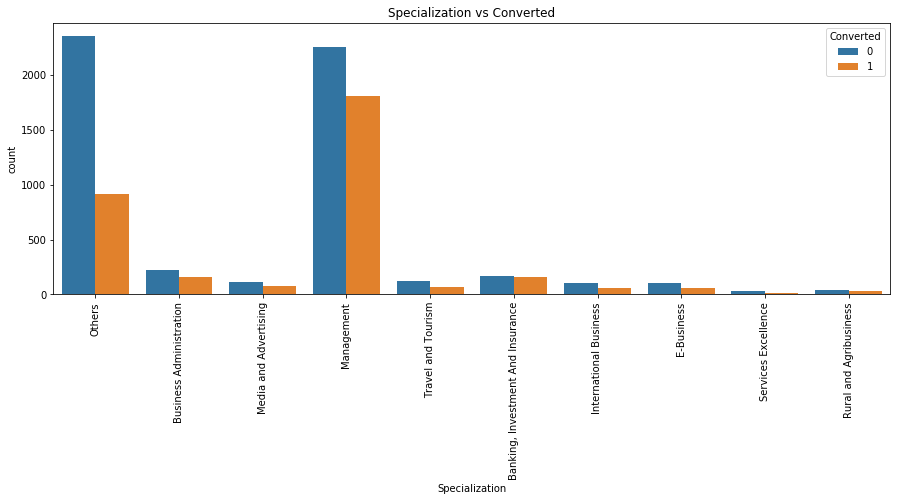

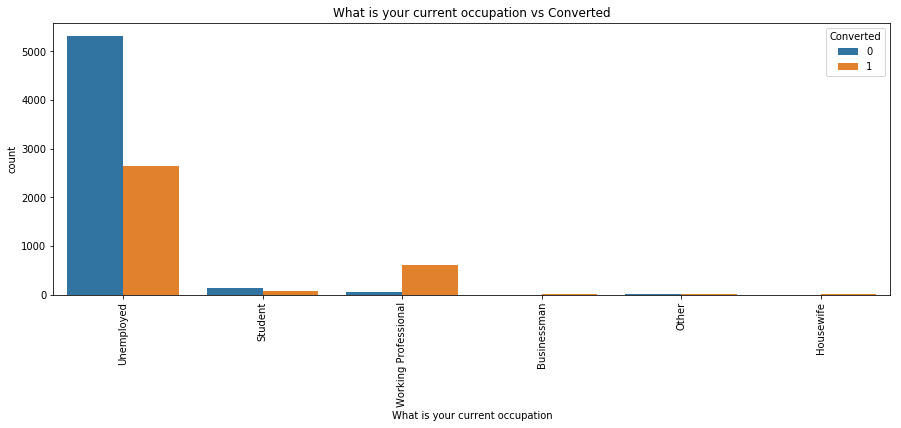

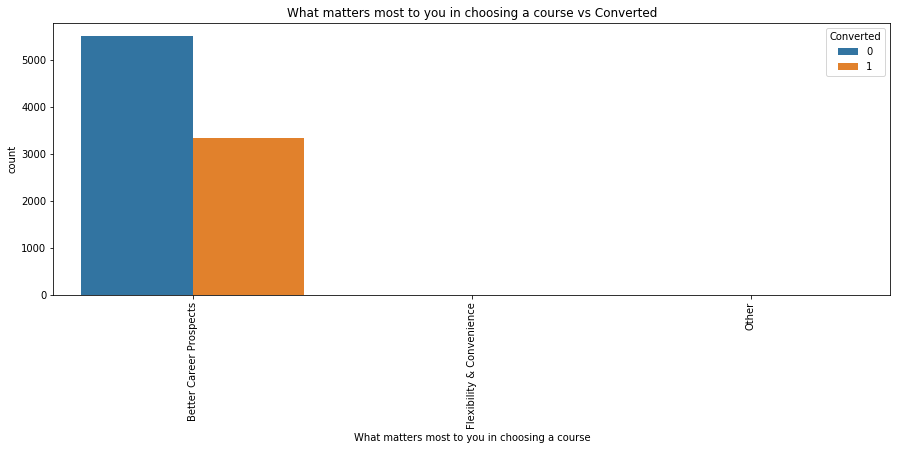

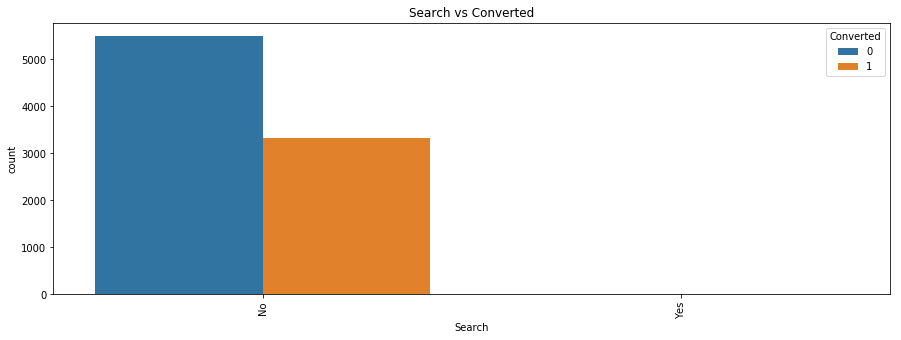

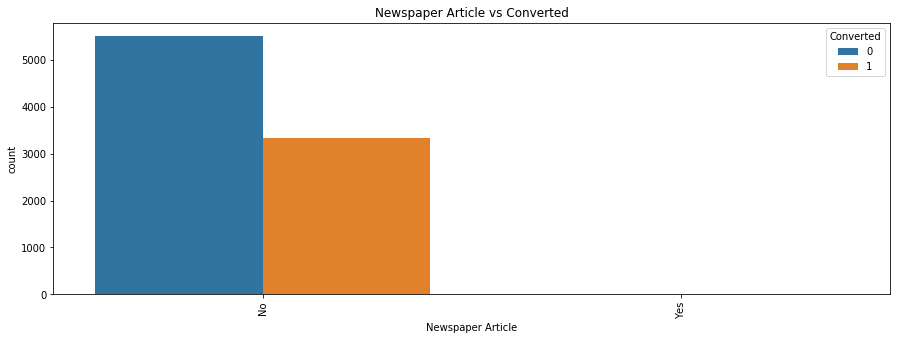

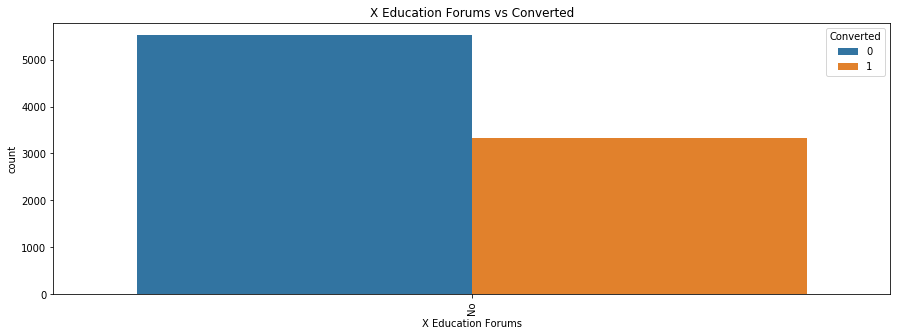

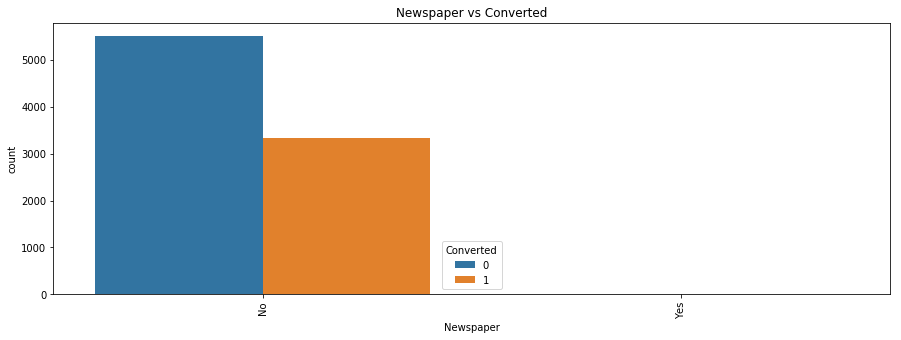

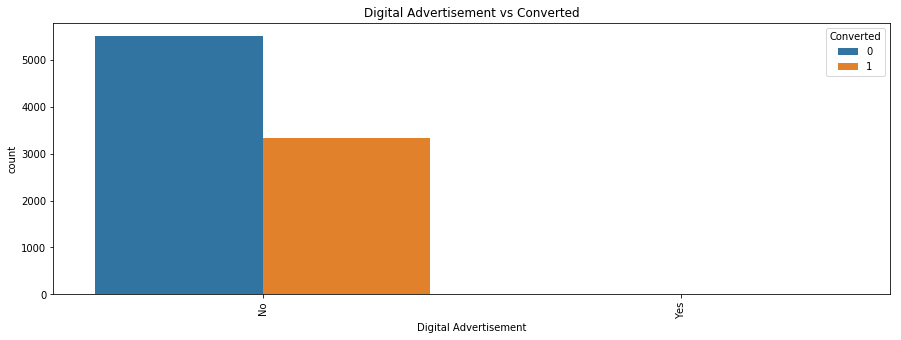

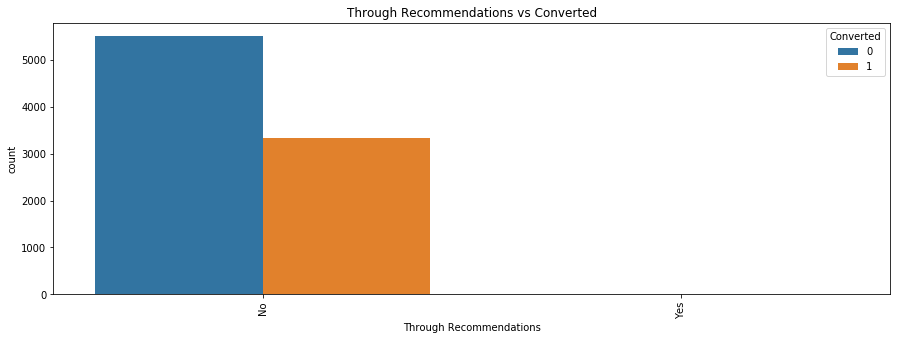

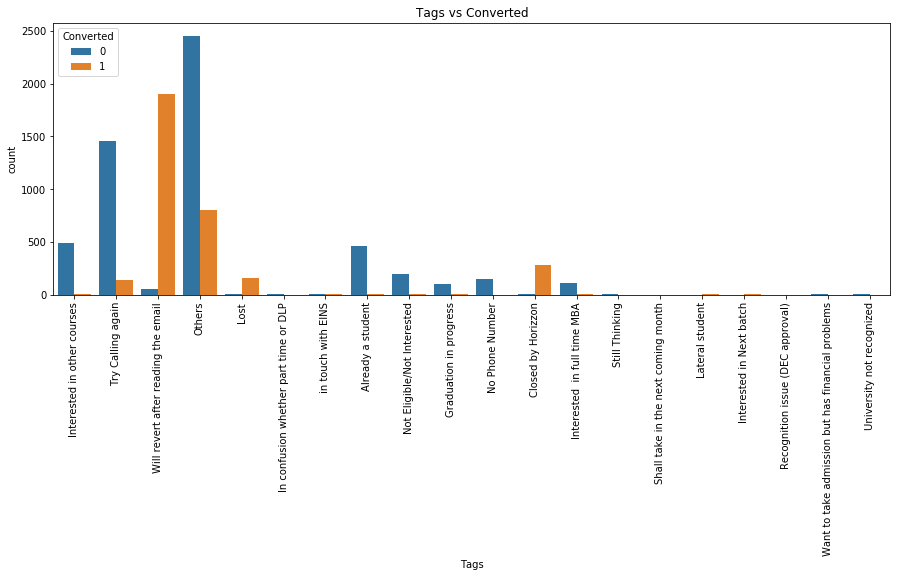

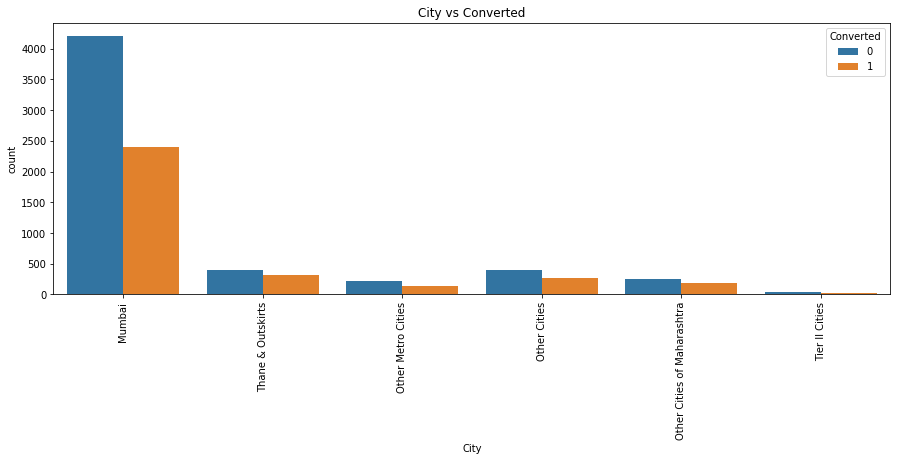

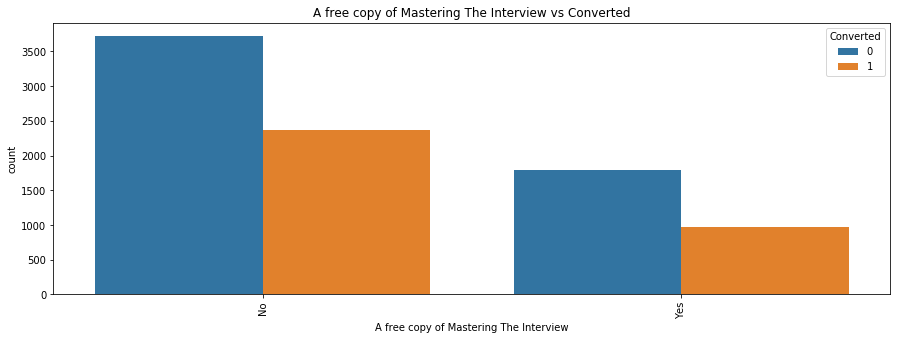

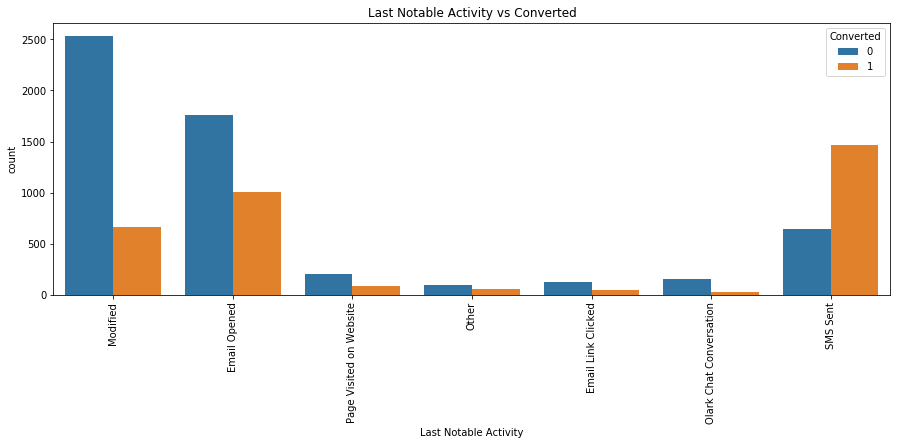

In [216]:
# Creating a list of all categorical columns and iterating over the list to plot count plots
cat_cols = df_lead.select_dtypes(include ="object").columns

for col in cat_cols:
    count_plot(col)

### Inferences:
    
 - Lead Origin vs Converted:
 
    - Lead Origin - 'Landing Page submission', constitute the majority of the leads.
    - Customers originating from 'Lead Add Form' have high probability of conversion.
    - Lead origin-'API' & 'Lead Import' have the least conversion rate. Customers from Lead Import are very few in number.
        
 - Lead Source 
     - Main sources of the leads are Google & Direct Traffic. 
     - Customers whose source are 'Google' and 'Reference' are more likely to be converted.
     
- Specialization
   - Most of the customers have specialization as 'Management'.
   - Customers with specialization as 'Rural & Agribusiness' are less likely to be converted.
    
- What is your current occupation
    - Customers who are 'Unemployed' are more likely to be converted.
    - Very few customers are Housewives.
    
- What matters most to you in choosing a career
    - Most of the customers to whom better career aspects matters most in choosing a career have higher probabilty of conversion.
    
- Search, Newspaper Article,X Education Forums, Newspaper & Digital Advertisement 
    - Customers who have seen the add of the education company in any form, are very few in number. Nothing meaningful insight can be concluded from the plot that will impove the overall lead conversion rate.
       
- Tags
    - More focus shall be given on the leads as 'will revert after reading the mail' & 'other' as these are potential leads and have higher rate of conversion.
     
- City
    - Majority of the customers are from 'Mumbai' city. Customers from Mumbai should be targeted more as these are the potential leads.
    
- A Free Copy Of Mastering the Interview
    - Customers who ask for 'afree copy of mastering the interview' are less in number but the conversion probabilty for both type of customers is similar.


- Last Notable Activity
    - Customers whose last notable activity was 'Modified' are more in number.
    - Customers whose last notable activity was 'SMS Sent' have higher probability of conversion.
    
- Do Not Call
   - Customers who do not opt for 'Do Not call' have higher conversion rate which is around 38%.These constitute the majority of the leads.
   
 - Last Activity
    - Customers who last activity was 'SMS Sent' have higher conversion rate which is around 63%. 
    - Customers who last activity was 'Email Opened' constitute majority of the customers. They have around 36% of conversion rate.

#### Handling high data imbalance
We can observe from the above plots that there is data imbalance in some columns. It is better to drop such columns as they might affect the results.

In [217]:
# Dropping the column which have data imbalance
imbalance_cols = ['Do Not Call','Country','Search', 'Digital Advertisement', 'Through Recommendations','What matters most to you in choosing a course','Newspaper Article','X Education Forums','Newspaper']
df_lead = df_lead.drop(imbalance_cols,axis =1)

#### Visualizing Numerical Columns with Target Column - Bivariate Analysis

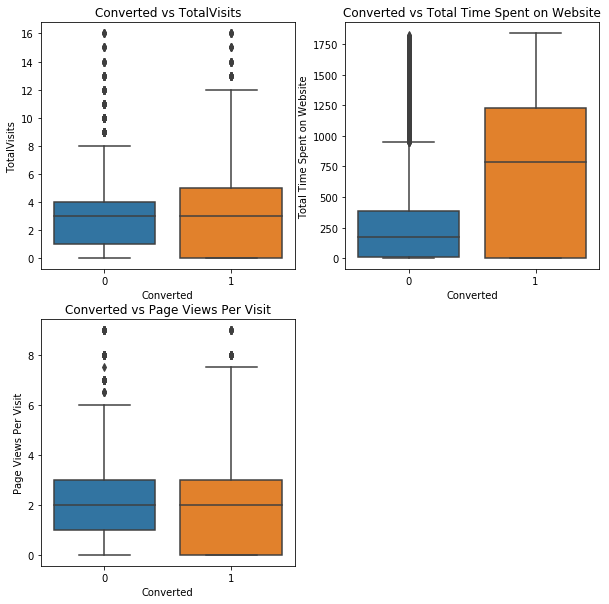

In [218]:
#Plotting box plots to check outliers after outlier treatment

plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.title("Converted vs TotalVisits")
sns.boxplot(x = 'Converted', y = 'TotalVisits', data = df_lead)

plt.subplot(2,2,2)
plt.title("Converted vs Total Time Spent on Website")
sns.boxplot(x = 'Converted', y = 'Total Time Spent on Website', data = df_lead)

plt.subplot(2,2,3)
plt.title("Converted vs Page Views Per Visit")
sns.boxplot(x = 'Converted', y = 'Page Views Per Visit', data = df_lead)

plt.show()

#### Observations from the above box plots

- Converted vs Total Time Spent on website
     - Users who spend more time on the website, have more chances of converting which is obvious.
- There is nothing much to infere from the other two plots as the medians of both converted and non-converted are same.

### Step 4: Data Preparation

In [219]:
#Converting Binary variables Yes/No to 0 or 1

def map_binary(x):
    return x.map({'Yes':1,'No':0})

df_lead[['Do Not Email','A free copy of Mastering The Interview']] = df_lead[['Do Not Email','A free copy of Mastering The Interview']].apply(map_binary)

df_lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,5,674,2.5,Email Opened,Others,Unemployed,Try Calling again,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.0,others,Media and Advertising,Unemployed,Try Calling again,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,1,2,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,0,Modified


#### Dummy variable creation

In [220]:
#creating dummy variables and dropping the first column

cols_cat = [i for i in df_lead.select_dtypes(include ='object').columns if len(df_lead[i].value_counts()) >2 and i != 'Lead Number']

dummy_df = pd.get_dummies(df_lead[cols_cat], drop_first= True)
df_lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,5,674,2.5,Email Opened,Others,Unemployed,Try Calling again,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.0,others,Media and Advertising,Unemployed,Try Calling again,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,1,2,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [221]:
#concatenating the dummy variables with Original DataFrame
df_lead = pd.concat([df_lead,dummy_df], axis =1)
df_lead.shape

(8849, 78)

In [222]:
#Dropping the variables which were converted into Dummies
df_lead.drop(cols_cat, axis =1, inplace = True)
df_lead.shape

(8849, 70)

In [223]:
#Creating X and y variables
y = df_lead['Converted']
X = df_lead.drop(['Converted','Lead Number'],axis = 1)

In [224]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [225]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,5,674,2.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,2,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,2,1428,1.0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


#### Splitting the Data into Train and Test Sets

In [226]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 100)

#### Feature Scaling

In [227]:
#Using Standard scaler
scale = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scale.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()     

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1217,0,-0.394246,-0.468573,-0.137946,1,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4659,0,3.104267,0.051778,0.387324,1,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3614,0,1.005159,-0.338012,0.387324,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2194,0,0.305456,1.429287,0.912594,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
437,0,-1.093949,-0.882961,-1.188486,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


### Step 5 : Model Building

In [228]:
logregmod=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logregmod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6194
Model:                            GLM   Df Residuals:                     6125
Model Family:                Binomial   Df Model:                           68
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1282.2
Date:                Sat, 25 Feb 2023   Deviance:                       2564.3
Time:                        13:46:30   Pearson chi2:                 7.62e+03
No. Iterations:                    22   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -6.5575      2.176     -3.014      0.003     -10.822      -2.293
Do Not Email                                              -0.7944      0.290     -2.738      0.006      -1.363      -0.226
TotalVisits                                                0.2576      0.081      3.199      0.001       0.100       0.415
Total Time Spent on Website                                1.1246      0.062     18.241      0.000       1.004       1.245
Page Views Per Visit                                      -0.2327      0.092     -2.536      0.011      -0.413      -0.053
A free copy of Mastering The Interview                    -0.0868      0.176     -0.492      0.623      -0.432       0.259
Lead Origin_Landing Page Submission                       -0.2088      0.231     -0.904      0.366      -0.661       0.244
Lead Origin_Lead Add Form                                  2.0610      1.233      1.672      0.094      -0.355       4.477
Lead Origin_Lead Import                                   22.0460   4.78e+04      0.000      1.000   -9.37e+04    9.38e+04
Lead Source_Google                                         0.1122      0.184      0.611      0.541      -0.248       0.472
Lead Source_Olark Chat                                     1.1928      0.246      4.851      0.000       0.711       1.675
Lead Source_Organic Search                                 0.1794      0.213      0.841      0.401      -0.239       0.598
Lead Source_Others                                         1.2585      0.904      1.392      0.164      -0.514       3.031
Lead Source_Reference                                     -0.9734      1.295     -0.752      0.452      -3.512       1.565
Lead Source_Referral Sites                                 0.2001      0.479      0.418      0.676      -0.739       1.139
Lead Source_Social Media                                 -20.9484   4.78e+04     -0.000      1.000   -9.38e+04    9.37e+04
Lead Source_Welingak Website                               3.2252      1.438      2.243      0.025       0.407       6.043
Last Activity_Email Bounced                               -0.3571      0.699     -0.511      0.609      -1.727       1.013
Last Activity_Email Link Clicked                           1.1942      0.602      1.982      0.047       0.013       2.375
Last Activity_Email Opened                                 0.7230      0.405      1.786      0.074      -0.070       1.516
Last Activity_Form Submitted on Website                    0.5981      0.658      0.909      0.363      -0.692       1.888
Last Activity_Olark Chat Conversation                      0.0444      0.407      0.109      0.913      -0.754       0.843
Last Activity_Page Visited on Website                      0.3471      0.500      0.694

#### Feature Selection Using RFE

In [229]:
logregmod=LogisticRegression()
rfe=RFE(logregmod,15)
rfe = rfe.fit(X_train,y_train)
rfe.support_

array([False, False,  True, False, False, False,  True, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True,  True, False, False,  True])

In [230]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 5),
 ('TotalVisits', False, 31),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 32),
 ('A free copy of Mastering The Interview', False, 34),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 17),
 ('Lead Source_Google', False, 51),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 43),
 ('Lead Source_Others', False, 4),
 ('Lead Source_Reference', False, 13),
 ('Lead Source_Referral Sites', False, 45),
 ('Lead Source_Social Media', False, 26),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 21),
 ('Last Activity_Email Link Clicked', False, 46),
 ('Last Activity_Email Opened', False, 11),
 ('Last Activity_Form Submitted on Website', False, 40),
 ('Last Activity_Olark Chat Conversation', False, 22),
 ('Last Activity_Page Visited on Website', False, 48),
 ('Last Activity_SMS Sent', True, 1),
 ('L

In [231]:
cols = X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Lateral student', 'Tags_Lost', 'Tags_No Phone Number',
       'Tags_Not Eligible/Not Interested', 'Tags_Others',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

#### Assesing the model with StatsModels

### Model 1

In [232]:
logregmod1 = sm.GLM(y_train,(sm.add_constant(X_train[cols])),family=sm.families.Binomial())
res = logregmod1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6194
Model:                            GLM   Df Residuals:                     6178
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1336.7
Date:                Sat, 25 Feb 2023   Deviance:                       2673.3
Time:                        13:46:46   Pearson chi2:                 7.44e+03
No. Iterations:                    20   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.8230      0.148    -25.917      0.000      -4.112      -3.534
Total Time Spent on Website                       1.1121      0.058     19.054      0.000       0.998       1.227
Lead Origin_Lead Add Form                         1.6419      0.360      4.555      0.000       0.935       2.348
Lead Source_Olark Chat                            1.3173      0.141      9.355      0.000       1.041       1.593
Lead Source_Welingak Website                      3.7177      0.811      4.582      0.000       2.127       5.308
Last Activity_SMS Sent                            1.3467      0.224      6.002      0.000       0.907       1.786
Tags_Closed by Horizzon                           8.6212      0.745     11.567      0.000       7.160      10.082
Tags_Lateral student                             24.5987   1.57e+04      0.002      0.999   -3.07e+04    3.08e+04
Tags_Lost                                         6.7430      0.396     17.013      0.000       5.966       7.520
Tags_No Phone Number                             -2.5601      1.037     -2.470      0.014      -4.592      -0.529
Tags_Not Eligible/Not Interested                 -1.0320      1.026     -1.006      0.314      -3.043       0.979
Tags_Others                                       2.1167      0.136     15.585      0.000       1.851       2.383
Tags_Will revert after reading the email          6.5686      0.216     30.381      0.000       6.145       6.992
Last Notable Activity_Modified                   -1.4250      0.148     -9.617      0.000      -1.715      -1.135
Last Notable Activity_Olark Chat Conversation    -1.5094      0.400     -3.770      0.000      -2.294      -0.725
Last Notable Activity_SMS Sent                    0.8331      0.256      3.253      0.001       0.331       1.335
=================================================================================================================
"""

In [233]:
#Calculating VIF for the model
#Calculate VIF of the model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train[cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF',ascending = False)

,Features,VIF
14,Last Notable Activity_SMS Sent,6.06
4,Last Activity_SMS Sent,6.04
1,Lead Origin_Lead Add Form,1.83
12,Last Notable Activity_Modified,1.73
11,Tags_Will revert after reading the email,1.68
2,Lead Source_Olark Chat,1.65
10,Tags_Others,1.65
0,Total Time Spent on Website,1.47
3,Lead Source_Welingak Website,1.33
5,Tags_Closed by Horizzon,1.21


#### Model 2

In [234]:
cols = cols.drop('Tags_Lateral student')
cols = cols.drop('Last Notable Activity_SMS Sent')
cols = cols.drop('Last Activity_SMS Sent')
logregmod2 = sm.GLM(y_train,(sm.add_constant(X_train[cols])),family = sm.families.Binomial())
res = logregmod2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6194
Model:                            GLM   Df Residuals:                     6181
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1524.1
Date:                Sat, 25 Feb 2023   Deviance:                       3048.2
Time:                        13:46:54   Pearson chi2:                 6.61e+03
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.6617      0.110    -24.224      0.000      -2.877      -2.446
Total Time Spent on Website                       1.1117      0.055     20.251      0.000       1.004       1.219
Lead Origin_Lead Add Form                         2.2587      0.350      6.455      0.000       1.573       2.945
Lead Source_Olark Chat                            1.1597      0.130      8.926      0.000       0.905       1.414
Lead Source_Welingak Website                      3.3433      0.804      4.156      0.000       1.767       4.920
Tags_Closed by Horizzon                           7.7473      0.736     10.521      0.000       6.304       9.191
Tags_Lost                                         6.1140      0.390     15.678      0.000       5.350       6.878
Tags_No Phone Number                             -2.2207      1.024     -2.169      0.030      -4.227      -0.214
Tags_Not Eligible/Not Interested                 -2.0415      1.026     -1.990      0.047      -4.052      -0.031
Tags_Others                                       1.7200      0.119     14.431      0.000       1.486       1.954
Tags_Will revert after reading the email          6.0773      0.198     30.654      0.000       5.689       6.466
Last Notable Activity_Modified                   -1.8029      0.117    -15.409      0.000      -2.032      -1.574
Last Notable Activity_Olark Chat Conversation    -2.1860      0.396     -5.523      0.000      -2.962      -1.410
=================================================================================================================
"""

In [235]:
#Verifying VIF
vif = pd.DataFrame()
X = X_train[cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.sort_values(by ='VIF', ascending = False)

,Features,VIF
1,Lead Origin_Lead Add Form,1.810657
2,Lead Source_Olark Chat,1.621037
8,Tags_Others,1.540501
0,Total Time Spent on Website,1.465145
10,Last Notable Activity_Modified,1.454311
9,Tags_Will revert after reading the email,1.399377
3,Lead Source_Welingak Website,1.327094
4,Tags_Closed by Horizzon,1.211620
11,Last Notable Activity_Olark Chat Conversation,1.061252
5,Tags_Lost,1.058185


#### Model 3

In [236]:
cols = cols.drop("Tags_Not Eligible/Not Interested")
logregmod3 = sm.GLM(y_train,(sm.add_constant(X_train[cols])),family = sm.families.Binomial())
res = logregmod3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6194
Model:                            GLM   Df Residuals:                     6182
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1527.9
Date:                Sat, 25 Feb 2023   Deviance:                       3055.9
Time:                        13:47:01   Pearson chi2:                 6.69e+03
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.7082      0.110    -24.732      0.000      -2.923      -2.494
Total Time Spent on Website                       1.1086      0.055     20.246      0.000       1.001       1.216
Lead Origin_Lead Add Form                         2.2512      0.349      6.450      0.000       1.567       2.935
Lead Source_Olark Chat                            1.1552      0.130      8.904      0.000       0.901       1.410
Lead Source_Welingak Website                      3.3466      0.804      4.162      0.000       1.771       4.923
Tags_Closed by Horizzon                           7.8015      0.736     10.597      0.000       6.359       9.244
Tags_Lost                                         6.1673      0.390     15.826      0.000       5.404       6.931
Tags_No Phone Number                             -2.1709      1.024     -2.121      0.034      -4.177      -0.165
Tags_Others                                       1.7697      0.119     14.922      0.000       1.537       2.002
Tags_Will revert after reading the email          6.1275      0.198     30.962      0.000       5.740       6.515
Last Notable Activity_Modified                   -1.8099      0.117    -15.495      0.000      -2.039      -1.581
Last Notable Activity_Olark Chat Conversation    -2.1826      0.396     -5.514      0.000      -2.958      -1.407
=================================================================================================================
"""

In [237]:
#Verifying VIF
vif = pd.DataFrame()
X = X_train[cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.sort_values(by ='VIF', ascending = False)

,Features,VIF
1,Lead Origin_Lead Add Form,1.810393
2,Lead Source_Olark Chat,1.620600
7,Tags_Others,1.529101
0,Total Time Spent on Website,1.465057
9,Last Notable Activity_Modified,1.406748
8,Tags_Will revert after reading the email,1.398212
3,Lead Source_Welingak Website,1.327067
4,Tags_Closed by Horizzon,1.209738
10,Last Notable Activity_Olark Chat Conversation,1.061018
5,Tags_Lost,1.056865


All variables have good value of VIF and p-value. So we need not drop any more variables and we can proceed with making predictions using this model only

#### Final Variables Selected are:

In [238]:
cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Tags_Closed by Horizzon', 'Tags_Lost', 'Tags_No Phone Number',
       'Tags_Others', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

### Step 6: Getting predicted values on train dataset

In [239]:
X_train_sm = sm.add_constant(X_train[cols])
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1217    0.188779
4659    0.065939
3614    0.954546
2194    0.245332
437     0.012846
6448    0.073655
3437    0.214411
7161    0.014918
8758    0.006171
3991    0.074809
dtype: float64

In [240]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18877895, 0.06593932, 0.95454607, 0.24533211, 0.01284604,
       0.07365541, 0.21441135, 0.01491821, 0.00617119, 0.07480866])

In [241]:
#Creating a df with the actual and the predicted probabilities
y_train_pred_final = pd.DataFrame()
y_train_pred_final['Lead_ID'] = y_train.index
y_train_pred_final['Converted'] = y_train.values
y_train_pred_final['Converted_prob'] = y_train_pred
y_train_pred_final.head()

,Lead_ID,Converted,Converted_prob
0,1217,0,0.188779
1,4659,0,0.065939
2,3614,1,0.954546
3,2194,0,0.245332
4,437,0,0.012846


In [242]:
#Creating new column 'predicted' with 1 if Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

In [84]:
y_train_pred_final.head()

,Lead_ID,Converted,Converted_prob,predicted
0,1217,0,0.188779,0
1,4659,0,0.065939,0
2,3614,1,0.954546,1
3,2194,0,0.245332,0
4,437,0,0.012846,0


In [243]:
from sklearn.metrics import confusion_matrix,classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve

In [245]:
# Confusion matrix
confusion = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'] )
print(confusion)

[[3676  151]
 [ 435 1932]]


In [246]:
#Checking overall accuracy
print(classification_report(y_train_pred_final['Converted'], y_train_pred_final['predicted'] ))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      3827
           1       0.93      0.82      0.87      2367

   micro avg       0.91      0.91      0.91      6194
   macro avg       0.91      0.89      0.90      6194
weighted avg       0.91      0.91      0.90      6194



In [247]:
print(accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'] ))

0.9053923151436875


### Summary
- Accuracy: 91%
- Recall:  82%
- Precision:  93%

### Finding Other Metrics

In [248]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [249]:
#Sensitivity
TP / float(TP+FN)

0.8162230671736375

In [250]:
#Specificity
TN / float(TN+FP)

0.9605435066631827

In [251]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9275084013442151


In [252]:
# Negative predictive value
print (TN / float(TN+ FN))

0.894186329360253


In [253]:
# False postive rate
print(FP/ float(TN+FP))

0.03945649333681735


### Step 7: Plotting ROC Curve

In [254]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(7, 7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [255]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

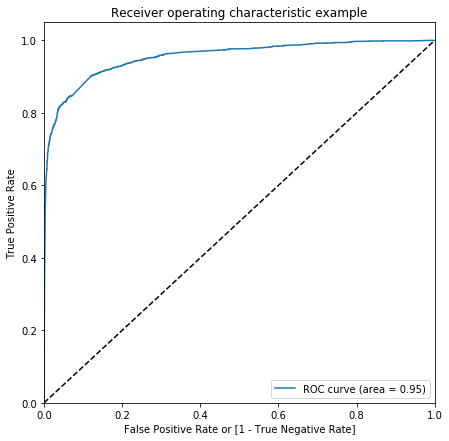

In [256]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Optimal Cutoff point

In [257]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead_ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1217,0,0.188779,0,1,1,0,0,0,0,0,0,0,0
1,4659,0,0.065939,0,1,0,0,0,0,0,0,0,0,0
2,3614,1,0.954546,1,1,1,1,1,1,1,1,1,1,1
3,2194,0,0.245332,0,1,1,1,0,0,0,0,0,0,0
4,437,0,0.012846,0,1,0,0,0,0,0,0,0,0,0


In [101]:
#calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.382144  1.000000  0.000000
0.1   0.1  0.798030  0.959442  0.698197
0.2   0.2  0.855667  0.927757  0.811079
0.3   0.3  0.886665  0.903676  0.876143
0.4   0.4  0.901356  0.830165  0.945388
0.5   0.5  0.905392  0.816223  0.960544
0.6   0.6  0.899419  0.790030  0.967076
0.7   0.7  0.893930  0.761301  0.975960
0.8   0.8  0.885373  0.722433  0.986151
0.9   0.9  0.874717  0.687368  0.990593


<Figure size 864x432 with 0 Axes>

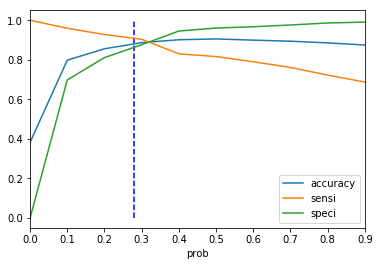

In [258]:
#Plotting
plt.figure(figsize = (12,6))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.28,ymax = 1.0,ymin=0.0,color='b',linestyle='--')
plt.show()

#### From the above curve, 0.27 is optimum point to take it as cutoff probability

In [259]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.27 else 0)

y_train_pred_final.head()

,Lead_ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1217,0,0.188779,0,1,1,0,0,0,0,0,0,0,0,0
1,4659,0,0.065939,0,1,0,0,0,0,0,0,0,0,0,0
2,3614,1,0.954546,1,1,1,1,1,1,1,1,1,1,1,1
3,2194,0,0.245332,0,1,1,1,0,0,0,0,0,0,0,0
4,437,0,0.012846,0,1,0,0,0,0,0,0,0,0,0,0


In [260]:
#Getting Lead Score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Lead_ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1217,0,0.188779,0,1,1,0,0,0,0,0,0,0,0,0,19
1,4659,0,0.065939,0,1,0,0,0,0,0,0,0,0,0,0,7
2,3614,1,0.954546,1,1,1,1,1,1,1,1,1,1,1,1,95
3,2194,0,0.245332,0,1,1,1,0,0,0,0,0,0,0,0,25
4,437,0,0.012846,0,1,0,0,0,0,0,0,0,0,0,0,1


In [261]:
#overall accuaracy
accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8803680981595092

#### Other Metrics

In [262]:
confusion2 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3301,  526],
       [ 215, 2152]], dtype=int64)

In [263]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [264]:
#calculating specificity
print("Specificity of the logistic regression model is: ",TN / float(TN+FP))

Specificity of the logistic regression model is:  0.86255552652208


In [265]:
#calculating sensitivity
print("Sensitivity of the logistic regression model is:  ",TP / float(TP+FN))

Sensitivity of the logistic regression model is:   0.9091677228559358


In [266]:
# Positive predictive value 
print("Positive Predictive rate:",TP / float(TP+FP))

# Negative predictive value
print("Negative Predictive rate:",TN / float(TN+ FN))

#False postive rate
print("False positive rate:",FP/ float(TN+FP))

Positive Predictive rate: 0.8035847647498133
Negative Predictive rate: 0.9388509670079636
False positive rate: 0.13744447347792005


In [267]:
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted ))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      3827
           1       0.80      0.91      0.85      2367

   micro avg       0.88      0.88      0.88      6194
   macro avg       0.87      0.89      0.88      6194
weighted avg       0.89      0.88      0.88      6194



In [268]:
print(accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'] ))

0.9053923151436875


### Summary
- Acuaracy : 90.53%
- Precision : 80%
- Recall : 91%
- f1-score : 85%

### Precision and Recall tradeoff

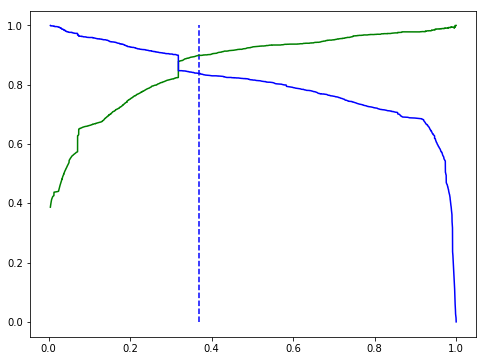

In [269]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.figure(figsize = (8,6))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "b-")
plt.vlines(x=0.37,ymax = 1.0,ymin=0.0,color='b',linestyle='--')
plt.show()

#### 0.38 is tradeoff between Recall and Precision
#### Hence we can say that we can consider any prospect lead with conversion rate of 38% to become a Hot Lead

### Step 8: Predictions on Test data

In [270]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scale.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2754,1,-0.394246,-0.619948,-0.663216,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2179,0,0.655308,-0.659684,1.437865,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5841,0,-1.093949,-0.882961,-1.188486,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
526,0,-0.044395,1.258991,0.387324,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3843,0,-0.394246,-0.266109,-0.137946,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [271]:
X_test = X_test[cols]
X_test_sm = sm.add_constant(X_test)

In [272]:
#Predicition on test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

2754    0.164409
2179    0.158446
5841    0.070957
526     0.042193
3843    0.047280
946     0.072253
190     0.070957
8997    0.230740
3931    0.043104
4794    0.634519
dtype: float64

In [273]:
# Converting y_pred to a dataframe
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
2754,0.164409
2179,0.158446
5841,0.070957
526,0.042193
3843,0.047280


In [274]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [275]:
# Converting Lead ID to index
y_test_df['Lead_ID'] = y_test_df.index

In [276]:
#Removing index and appending them in side ways
y_test_df.reset_index(drop=True, inplace=True)
y_pred_df.reset_index(drop=True, inplace=True)

In [277]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final.head()

,Converted,Lead_ID,0
0,0,2754,0.164409
1,0,2179,0.158446
2,0,5841,0.070957
3,0,526,0.042193
4,0,3843,0.047280


In [278]:
# Renaming and Rearranging
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [279]:
y_pred_final = y_pred_final.reindex_axis(['Lead_ID','Converted','Converted_prob'], axis=1)

In [280]:
y_pred_final.head()

,Lead_ID,Converted,Converted_prob
0,2754,0,0.164409
1,2179,0,0.158446
2,5841,0,0.070957
3,526,0,0.042193
4,3843,0,0.047280


In [281]:
#Assigning Lead Scores
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Lead_ID,Converted,Converted_prob,Lead_Score
0,2754,0,0.164409,16
1,2179,0,0.158446,16
2,5841,0,0.070957,7
3,526,0,0.042193,4
4,3843,0,0.047280,5


In [282]:
#Assuming 0.38 as the cutoff using precision recall tradeoff
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.38 else 0)

In [283]:
y_pred_final.head()

,Lead_ID,Converted,Converted_prob,Lead_Score,final_predicted
0,2754,0,0.164409,16,0
1,2179,0,0.158446,16,0
2,5841,0,0.070957,7,0
3,526,0,0.042193,4,0
4,3843,0,0.047280,5,0


In [284]:
#Checking overall accuracy
print("Accuracy on Test data is ",accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy on Test data is  0.9160075329566855


In [285]:
confusion2 = confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1605,   82],
       [ 141,  827]], dtype=int64)

In [286]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [287]:
#calculating specificity
print("Specificity of the logistic model on test data is:",TN / float(TN+FP))

Specificity of the logistic model on test data is: 0.951393005334914


In [288]:
#calculating sensitivity
print("Sensitivity of the logistic model on test data is:",TP / float(TP+FN))

Sensitivity of the logistic model on test data is: 0.8543388429752066


In [289]:
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1687
           1       0.91      0.85      0.88       968

   micro avg       0.92      0.92      0.92      2655
   macro avg       0.91      0.90      0.91      2655
weighted avg       0.92      0.92      0.92      2655



In [290]:
print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted ))

0.8803680981595092


### Step 9 Final Observation

**Train Data**
- Acuaracy : 90.53%
- Precision : 80%
- Recall : 91%
- f1-score : 85%

**Test Data**
- Acuaracy : 88.03%
- Precision : 91%
- Recall : 85%
- f1-score : 88%

#### From the above values of Train and Test data, we can say that model's prediction of conversion rate is good and can help the company in selecting Hot Leads.

### Step 10 Conclusion

In [293]:
#### Leads and Lead scores summary
cols1 = y_pred_final.columns
all_leads = pd.concat([y_train_pred_final[cols1],y_pred_final])

# Let us observe the behaviour of leads for various original attributes of the dataframe
all_leads = pd.merge(all_leads,df_lead.reset_index(), left_on = 'Lead_ID',right_on = 'index', how = 'left').drop(['Converted_y','index','Lead_ID'],axis =1)
all_leads.rename(columns = {'Converted_x':'Converted'}, inplace = True)

# Changing the position of `Lead Number` column
col_position = all_leads.columns.tolist()
col_position.insert(0, col_position.pop(col_position.index('Lead Number')))
all_leads = all_leads.reindex(columns = col_position)
all_leads.head()

,Lead Number,Converted,Converted_prob,Lead_Score,final_predicted,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,646938,0,0.188779,19,0,0,2,219,2.0,1,...,1,0,0,0,1,0,0,0,0,0
1,615031,0,0.065939,7,0,0,12,494,3.0,1,...,0,0,1,0,1,0,0,0,0,0
2,625866,1,0.954546,95,1,0,6,288,3.0,1,...,0,0,1,0,0,0,0,0,0,1
3,638579,0,0.245332,25,0,0,4,1222,4.0,0,...,0,0,1,0,1,0,0,0,0,0
4,655666,0,0.012846,1,0,0,0,0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


#### Hot leads with more than 80% lead score(conversion_rate)

In [294]:
Hot_leads = all_leads.loc[all_leads['Lead_Score'] > 80,:].sort_values(by = 'Lead_Score', ascending = False)
Hot_leads.head()

,Lead Number,Converted,Converted_prob,Lead_Score,final_predicted,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3600,647212,1,0.996450,100,1,0,9,1524,9.0,1,...,0,0,0,0,0,0,0,0,0,1
3448,603586,1,0.998283,100,1,0,0,0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
3291,608305,1,0.999915,100,1,0,3,1431,1.0,1,...,0,0,0,0,0,0,0,0,1,0
3298,603490,1,0.996762,100,1,0,7,1568,7.0,0,...,1,0,0,0,0,0,0,0,0,1
3322,595178,1,0.998910,100,1,0,14,1290,3.5,1,...,0,0,0,0,1,0,0,0,0,0


In [296]:
#### Leads and their relationship with other variables

#Concatinating predictions on train & test data
cols2 = y_pred_final.columns
lead_score = pd.concat([y_train_pred_final[cols2],y_pred_final[cols2]])

# concatinating Variables selected in our final regression model
lead_score = pd.merge(lead_score,df_lead[cols].reset_index(), left_on = 'Lead_ID',right_on = 'index', how = 'left')
lead_score = lead_score.sort_values(by = 'Lead_Score', ascending = False)
lead_score.drop('index',axis = 1,inplace = True)
lead_score.head()

,Lead_ID,Converted,Converted_prob,Lead_Score,final_predicted,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Tags_Closed by Horizzon,Tags_Lost,Tags_No Phone Number,Tags_Others,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
968,4982,1,0.997896,100,1,1774,0,0,0,0,0,0,0,1,0,0
3900,5662,1,0.997323,100,1,1659,0,0,0,0,0,0,0,1,0,0
7034,2392,1,0.996603,100,1,1545,0,0,0,0,0,0,0,1,0,0
4959,3286,1,0.999630,100,1,0,1,0,1,1,0,0,0,0,1,0
4072,5334,1,0.995822,100,1,1446,0,0,0,0,0,0,0,1,0,0


### Summary
- To achieve maximum conversion with less amount of time spent on cold calling company should invest time on Hot Leads i.e, Leads who has more than 80% conversion rate. All the Potential Leads can be approached when the sales person have enough time to invest as the conversion rate is comparitively less.